In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
!pip install librosa

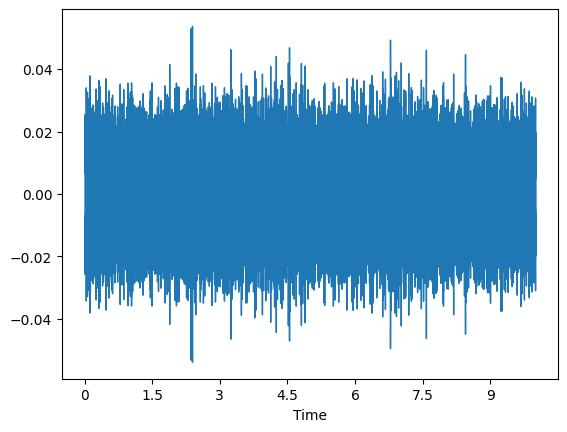

In [2]:
import IPython.display as ipd
import librosa, librosa.display
import matplotlib.pyplot
data,frame=librosa.load(r"/kaggle/input/dc2020task2/pump/train/normal_id_00_00000000.wav")
librosa.display.waveshow(data,sr=frame)
ipd.Audio(r"/kaggle/input/dc2020task2/pump/train/normal_id_00_00000000.wav")

In [3]:
mfccs = librosa.feature.mfcc(y=data, sr=frame, n_mfcc=40)
print(mfccs)

[[-3.7893146e+02 -3.3475894e+02 -3.3366293e+02 ... -3.3037479e+02
  -3.3814832e+02 -3.4152390e+02]
 [ 1.5151471e+02  1.5587582e+02  1.5396341e+02 ...  1.5440538e+02
   1.5277881e+02  1.3871719e+02]
 [-4.3633148e+01 -4.9523430e+01 -5.1508137e+01 ... -5.1263763e+01
  -5.2353474e+01 -3.5569160e+01]
 ...
 [-9.2611923e+00 -6.1282988e+00 -6.1489048e+00 ... -2.3639762e+00
  -4.6332068e+00 -3.1145182e+00]
 [-3.9518812e+00  1.2853085e+00  4.5437489e+00 ...  3.8639340e+00
   7.0504341e+00  7.0255632e+00]
 [-6.6101389e+00 -3.8423123e+00 -9.9124700e-02 ... -7.0294852e+00
   3.1771904e-01  1.4003661e+00]]


In [151]:
!pip install AudioPy-ML

In [163]:
from Audiopy_ML import autoaudio
audio_dataset_path=glob.glob(r"/kaggle/input/dc2020task2/pump/train/*.wav")
df=autoaudio.AutomatedExtractor_multiple(audio_dataset_path)

In [161]:
audio_dataset_path=glob.glob(r"/kaggle/input/dc2020task2/pump/test/*.wav")
test_audio=autoaudio.AutomatedExtractor_multiple(audio_dataset_path)

In [166]:
df.shape

(3349, 7)

In [167]:
test_data.shape

(856, 7)

In [168]:
df = df.applymap(lambda x: np.median(x))
test_data = test_data.applymap(lambda x: np.median(x))
print(df.shape,test_data.shape)

(3349, 7) (856, 7)


In [169]:
x=np.array(df).tolist()
x=np.array(x)
x_t=np.array(test_data).tolist()
x_t=np.array(x_t)

In [170]:
x.shape,x_t.shape

((3349, 7), (856, 7))

In [171]:
from sklearn.preprocessing import StandardScaler, Normalizer
x=Normalizer().fit_transform(x)
x_t=Normalizer().fit_transform(x_t)
x=StandardScaler().fit_transform(x)
x_t=StandardScaler().fit_transform(x_t)

In [175]:
from keras import Sequential
from keras.layers import *
autoencoder=Sequential()
autoencoder.add(Dense(64,activation='elu',input_shape=([7])))
autoencoder.add(Dense(32,activation='elu'))
autoencoder.add(Dense(16,activation='elu'))
autoencoder.add(Dense(8,activation='elu'))
autoencoder.add(Dense(4,activation='elu'))
autoencoder.add(Dense(8,activation='elu'))
autoencoder.add(Dense(16,activation='elu'))
autoencoder.add(Dense(32,activation='elu'))
autoencoder.add(Dense(64,activation='elu'))
autoencoder.add(Dense(7,activation='elu'))

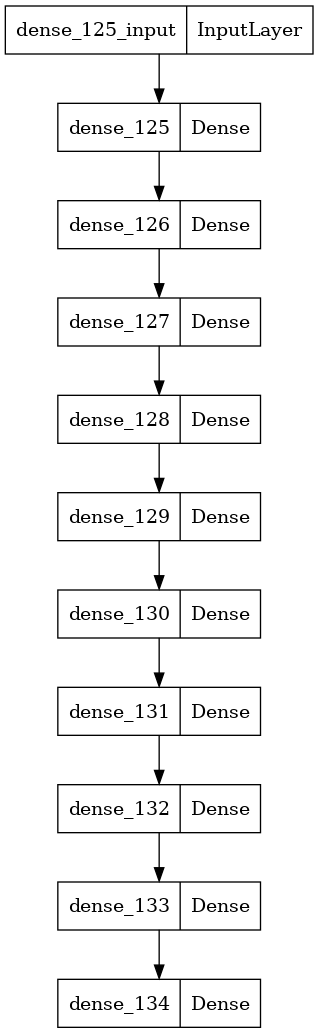

In [176]:
from keras.utils import plot_model
plot_model(autoencoder)

In [177]:
lrp=tf.keras.callbacks.ReduceLROnPlateau(monitor='loss',factor=0.05,patience=2)
autoencoder.compile('adam','mse',metrics=['mean_squared_error','mean_absolute_error','mean_squared_logarithmic_error'])
history=autoencoder.fit(x,x,epochs=150,validation_data=(x_t,x_t),verbose=1,callbacks=lrp)

Epoch 1/150
105/105 [==============================] - 3s 6ms/step - loss: 0.4258 - mean_squared_error: 0.4258 - mean_absolute_error: 0.3383 - mean_squared_logarithmic_error: 0.0347 - val_loss: 0.3126 - val_mean_squared_error: 0.3126 - val_mean_absolute_error: 0.2879 - val_mean_squared_logarithmic_error: 0.0195 - lr: 0.0010
Epoch 2/150
105/105 [==============================] - 0s 4ms/step - loss: 0.2613 - mean_squared_error: 0.2613 - mean_absolute_error: 0.2189 - mean_squared_logarithmic_error: 0.0081 - val_loss: 0.2830 - val_mean_squared_error: 0.2830 - val_mean_absolute_error: 0.2654 - val_mean_squared_logarithmic_error: 0.0169 - lr: 0.0010
Epoch 3/150
105/105 [==============================] - 0s 4ms/step - loss: 0.2486 - mean_squared_error: 0.2486 - mean_absolute_error: 0.2055 - mean_squared_logarithmic_error: 0.0070 - val_loss: 0.2542 - val_mean_squared_error: 0.2542 - val_mean_absolute_error: 0.2337 - val_mean_squared_logarithmic_error: 0.0130 - lr: 0.0010
Epoch 4/150
105/105 [=

In [178]:
autoencoder.evaluate(x,x)

105/105 [==============================] - 0s 2ms/step - loss: 0.0723 - mean_squared_error: 0.0723 - mean_absolute_error: 0.1173 - mean_squared_logarithmic_error: 9.7015e-04


[0.07225006818771362,
 0.07225006818771362,
 0.11730196326971054,
 0.0009701504604890943]

In [179]:
autoencoder.evaluate(x_t,x_t)

27/27 [==============================] - 0s 2ms/step - loss: 0.0848 - mean_squared_error: 0.0848 - mean_absolute_error: 0.1533 - mean_squared_logarithmic_error: 0.0038


[0.08478036522865295,
 0.08478036522865295,
 0.15328167378902435,
 0.003823752049356699]

105/105 [==============================] - 0s 2ms/step


(array([2.662e+03, 2.350e+02, 1.130e+02, 7.500e+01, 4.800e+01, 4.100e+01,
        3.000e+01, 3.000e+01, 1.200e+01, 1.500e+01, 1.500e+01, 8.000e+00,
        7.000e+00, 1.000e+01, 1.000e+01, 2.000e+00, 6.000e+00, 7.000e+00,
        2.000e+00, 5.000e+00, 3.000e+00, 0.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([2.26307320e-04, 6.26223797e-02, 1.25018452e-01, 1.87414525e-01,
        2.49810597e-01, 3.12206669e-01, 3.74602742e-01, 4.36998814e-01,
        4.99394887e-01, 5.61790959e-01, 6.24187031e-01, 6.86583104e-01,
        7.48979176e-01, 8.11375249e-01, 8.73771321e-01, 9.36167393e-01,
        9.98563466e-01, 1.06095954e+00, 1.12335561e+00, 1.18575168e+00,
        1.248147

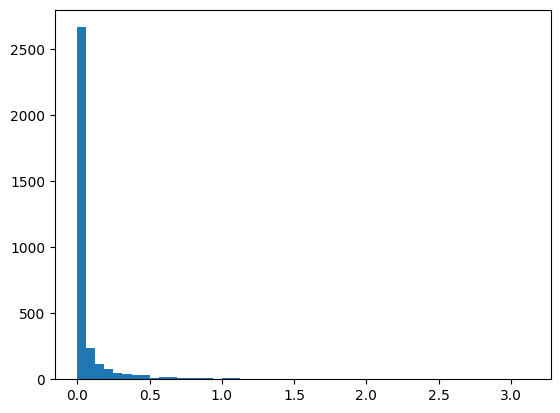

In [180]:
import matplotlib.pyplot as plt
reconstruction = autoencoder.predict(x)
train_loss = tf.keras.losses.mse(reconstruction, x)
mse = np.mean(np.power(x - reconstruction, 2), axis=1)
plt.hist(train_loss, bins=50)

27/27 [==============================] - 0s 2ms/step


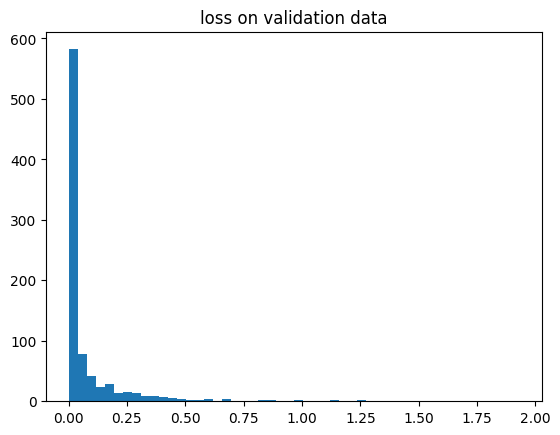

In [181]:
import matplotlib.pyplot as plt
reconstruction_a = autoencoder.predict(x_t)
train_loss_a = tf.keras.losses.mse(reconstruction_a, x_t)
mse_t = np.mean(np.power(x_t - reconstruction_a, 2), axis=1)
plt.hist(train_loss_a, bins=50)
plt.title("loss on validation data")
plt.show()
threshold = np.percentile(train_loss_a,80)

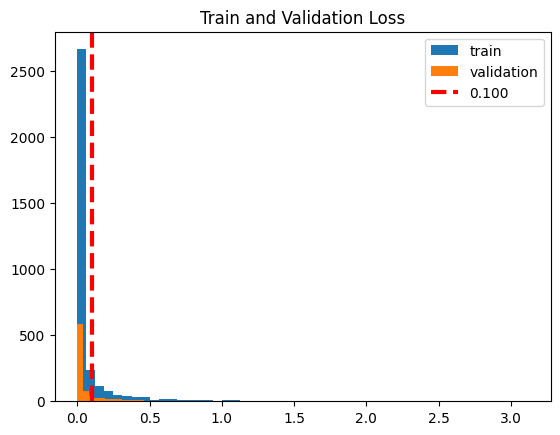

In [183]:
plt.hist(train_loss, bins=50, label='train')
plt.hist(train_loss_a, bins=50, label='validation')
plt.axvline(threshold, color='r', linewidth=3, linestyle='dashed', label='{:0.3f}'.format(threshold))
plt.legend(loc='upper right')
plt.title("Train and Validation Loss")
plt.show()

In [184]:
predictions=[]
loss=[]
for i in x_t:
    i=np.expand_dims(i,axis=0)
    out=autoencoder.predict(i)
    predictions.append(out)
    prediction_loss = tf.keras.losses.mae(out, i)
    loss.append(prediction_loss)

1/1 [==============================] - 0s 37ms/step


In [185]:
dataset=pd.DataFrame()
dataset['loss for predictions']=loss

In [189]:
print(threshold)
a=[]
for i in dataset['loss for predictions']:
    if np.array(i)<threshold:
         a.append(0)
    else:
        a.append(1)
dataset['predicted status']=a
dataset.head()

0.09975100882135671


,loss for predictions,predicted status
0,"(tf.Tensor(0.191228769316974, shape=(), dtype=...",1
1,"(tf.Tensor(0.2159086557649892, shape=(), dtype...",1
2,"(tf.Tensor(0.08126233702301608, shape=(), dtyp...",0
3,"(tf.Tensor(0.23582973044317398, shape=(), dtyp...",1
4,"(tf.Tensor(0.24134047626539376, shape=(), dtyp...",1


In [190]:
dataset['predicted status'].value_counts()

predicted status
1    476
0    380
Name: count, dtype: int64